In [1]:
%matplotlib inline

In [2]:
# Add dependencies and Setup.
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# Load csv file 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
#  Read city data file  and stor3e it in pandas datafraem
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(12)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read ride data filr and store it in a pandas dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(12)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [6]:
# Get the null values from the city data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the data types from th city data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique value of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the numbe of data points from urban cities
sum(city_data_df["type"]== "Urban")

66

In [10]:
sum(city_data_df["type"]== "Suburban")

36

In [11]:
sum(city_data_df["type"]== "Rural")

18

In [12]:
# Get the colums and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the  from the ride data.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data type of ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [16]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [17]:
# Create the Suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [18]:
# Create the Rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [19]:
# Get the nuber of rides for urban cityes.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
# Get the nuber of rides for Suburban cityes.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [21]:
# Get the nuber of rides for Rural cityes.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [22]:
# Get the average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
# Get the average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [24]:
# Get the average fare for each city in the ruralcities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [25]:
# Get the average number of drivers for each citytype in the urban cities/
urban_avg_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the average number of drivers for ech citytype in the suburban cities/
suburban_avg_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [27]:
# Get the average number of drivers for each citytype in the rural cities/
rural_avg_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

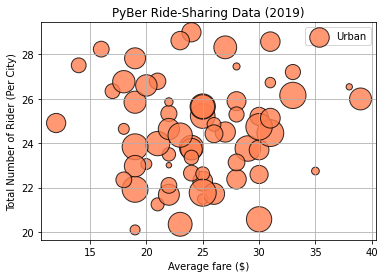

In [28]:
# Build the scatter plots for Urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_driver_count, color="coral", edgecolor="black", 
            linewidth=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average fare ($)")
plt.ylabel("Total Number of Rider (Per City)")
plt.grid(True)
plt.legend()

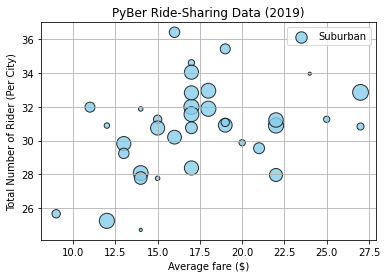

In [29]:
# Build the scatter plots for Suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_avg_driver_count, color="skyblue", edgecolor="black", 
            linewidth=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average fare ($)")
plt.ylabel("Total Number of Rider (Per City)")
plt.grid(True)
plt.legend()

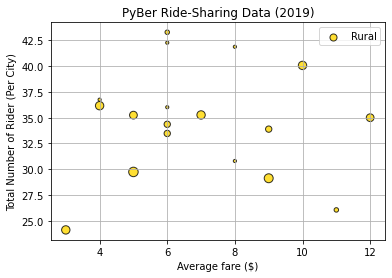

In [30]:
# Build the scatter plots for Rural cities.
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_driver_count, color="gold", edgecolor="black",
            linewidth=1, alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average fare ($)")
plt.ylabel("Total Number of Rider (Per City)")
plt.grid(True)
plt.legend()

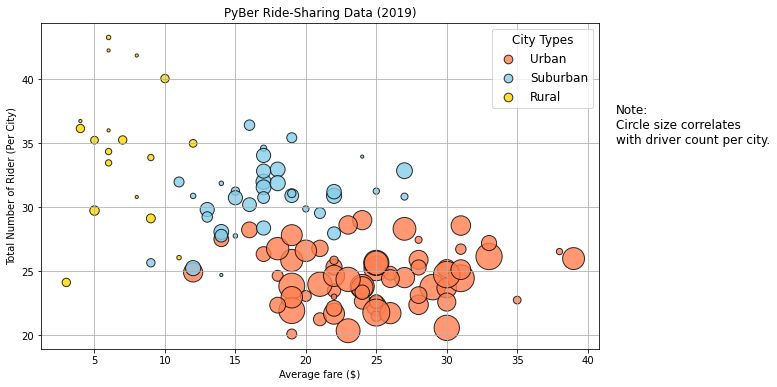

In [31]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_avg_driver_count, color="coral", edgecolor="black", 
            linewidth=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average fare ($)")
plt.ylabel("Total Number of Rider (Per City)")
plt.grid(True)
plt.legend()

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_avg_driver_count, color="skyblue", edgecolor="black", 
            linewidth=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average fare ($)")
plt.ylabel("Total Number of Rider (Per City)")
plt.grid(True)
plt.legend()

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_avg_driver_count, color="gold", edgecolor="black",
            linewidth=1, alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average fare ($)")
plt.ylabel("Total Number of Rider (Per City)")
plt.grid(True)
plt.legend()

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",scatterpoints=1, 
                  loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.",fontsize=12)

# Save Figure
plt.savefig("analysis/Fig1.png")
# Show plot
plt.show()

In [32]:
# Get the summary statistic.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [33]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [34]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [35]:
# Get the statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
# Calculate the median of the ride count for each city type.
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [40]:
# Calculate the mode of the ride count for each city type.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [41]:
# Import Numpy and stats module for SciPy
import numpy as np
import scipy.stats as sts

In [42]:
# Calculate the measures of central tendency for ride count of urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban cities is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mean for the ride counts for urban cities is {mode_urban_ride_count}.")


The mean for the ride counts for urban cities is 24.62.
The median for the ride counts for urban trips is 24.0.
The mean for the ride counts for urban cities is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [43]:
# Calculate the measures of central tendency for ride count of suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban cities is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mean for the ride counts for suburban cities is {mode_suburban_ride_count}.")


The mean for the ride counts for suburban cities is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mean for the ride counts for suburban cities is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [44]:
# Calculate the measures of central tendency for ride count of rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural cities is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mean for the ride counts for rural cities is {mode_rural_ride_count}.")


The mean for the ride counts for rural cities is 6.94.
The median for the ride counts for rural trips is 6.0.
The mean for the ride counts for rural cities is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [46]:
# Get the fares for the urban cities.
urban_fare = urban_cities_df["fare"]
urban_fare.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [47]:
# Get the fares for the suburban cities.
suburban_fare = suburban_cities_df["fare"]
suburban_fare.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [48]:
# Get the fares for the rural cities.
rural_fare = rural_cities_df["fare"]
rural_fare.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [49]:
# Calculate the measures of central tendency for fare of urban cities.
mean_urban_fare = np.mean(urban_fare)
print(f"The mean for the fare for urban cities is {mean_urban_fare:.2f}.")

median_urban_fare = np.median(urban_fare)
print(f"The median for the fare for urban cities is {median_urban_fare}.")

mode_urban_fare = sts.mode(urban_fare)
print(f"The mode for the fare for urban cities is {mode_urban_fare}.")


The mean for the fare for urban cities is 24.53.
The median for the fare for urban cities is 24.64.
The mode for the fare for urban cities is ModeResult(mode=array([22.86]), count=array([5])).


In [50]:
# Calculate the measures of central tendency for fare of suburban cities.
mean_suburban_fare = np.mean(suburban_fare)
print(f"The mean for the fare for suburban cities is {mean_suburban_fare:.2f}.")

median_suburban_fare = np.median(suburban_fare)
print(f"The median for the fare for suburban cities is {median_suburban_fare}.")

mode_suburban_fare = sts.mode(suburban_fare)
print(f"The mode for the fare for suburban cities is {mode_suburban_fare}.")


The mean for the fare for suburban cities is 30.97.
The median for the fare for suburban cities is 30.75.
The mode for the fare for suburban cities is ModeResult(mode=array([17.99]), count=array([3])).


In [51]:
# Calculate the measures of central tendency for fare of rural cities.
mean_rural_fare = np.mean(rural_fare)
print(f"The mean for the fare for rural cities is {mean_rural_fare:.2f}.")

median_rural_fare = np.median(rural_fare)
print(f"The median for the fare for rural cities is {median_rural_fare}.")

mode_rural_fare = sts.mode(rural_fare)
print(f"The mode for the fare for rural cities is {mode_rural_fare}.")


The mean for the fare for rural cities is 34.62.
The median for the fare for rural cities is 37.05.
The mode for the fare for rural cities is ModeResult(mode=array([37.05]), count=array([2])).


In [52]:
# Get the driver's count for the urban cities.
urban_driver_count = urban_cities_df["driver_count"]
urban_driver_count.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [53]:
# Get the driver's count for the suburban cities.
suburban_driver_count = suburban_cities_df["driver_count"]
suburban_driver_count.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [54]:
# Get the driver's count for the rural cities.
rural_driver_count = rural_cities_df["driver_count"]
rural_driver_count.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [55]:
# Calculate the measures of central tendency for driver count of urban cities.
mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean for the driver count for urban cities is {mean_urban_driver_count:.0f}.")

median_urban_driver_count = np.median(urban_driver_count)
print(f"The median for the driver count for urban cities is {median_urban_driver_count}.")

mode_urban_driver_count = sts.mode(urban_driver_count)
print(f"The mode for the driver for urban cities is {mode_urban_driver_count}.")

The mean for the driver count for urban cities is 37.
The median for the driver count for urban cities is 37.0.
The mode for the driver for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [56]:
# Calculate the measures of central tendency for driver count of suburban cities.
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean for the driver count for suburban cities is {mean_suburban_driver_count:.0f}.")

median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median for the driver count for suburban cities is {median_suburban_driver_count}.")

mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f"The mode for the driver for suburban cities is {mode_suburban_driver_count}.")

The mean for the driver count for suburban cities is 14.
The median for the driver count for suburban cities is 16.0.
The mode for the driver for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [57]:
# Calculate the measures of central tendency for driver count of rural cities.
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean for the driver count for rural cities is {mean_rural_driver_count:.0f}.")

median_rural_driver_count = np.median(rural_driver_count)
print(f"The median for the driver count for rural cities is {median_rural_driver_count}.")

mode_rural_driver_count = sts.mode(rural_driver_count)
print(f"The mode for the driver for rural cities is {mode_rural_driver_count}.")

The mean for the driver count for rural cities is 4.
The median for the driver count for rural cities is 4.0.
The mode for the driver for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


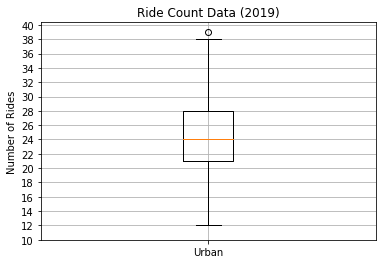

In [58]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

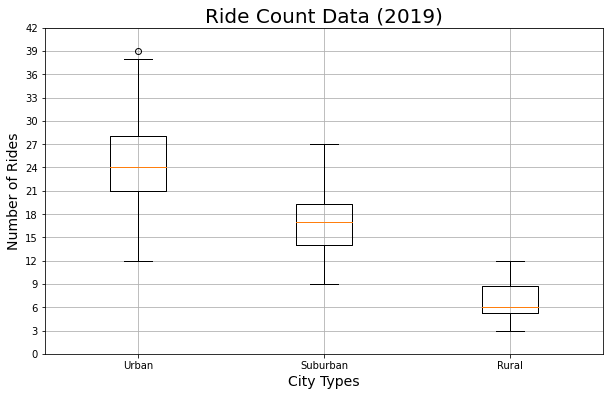

In [59]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [60]:
# Get th city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} is has the highest number of ride.")

West Angela is has the highest number of ride.


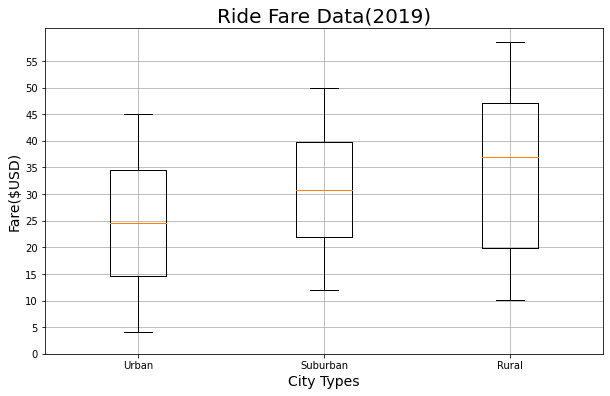

In [61]:
# Create all fare count box and whister plots.
x_labels =["Urban", "Suburban", "Rural"]
fare_count = [urban_fare, suburban_fare, rural_fare]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_count, labels=x_labels)
ax.set_title("Ride Fare Data(2019)", fontsize=20)
ax.set_xlabel("City Types",fontsize=14)
ax.set_ylabel("Fare($USD)",fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
#Save  the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

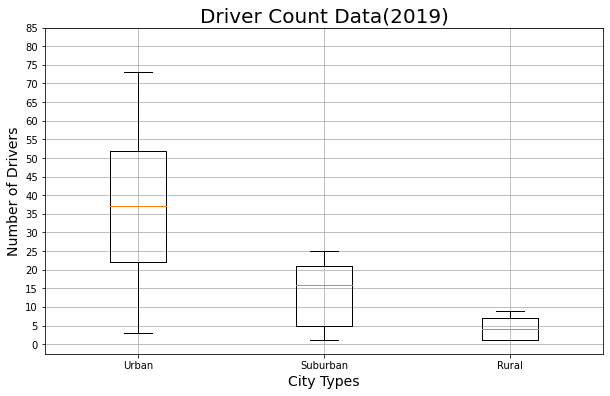

In [62]:
# Create all driver count count box and whister plots.
x_labels =["Urban", "Suburban", "Rural"]
driver_count = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count, labels=x_labels)
ax.set_title("Driver Count Data(2019)", fontsize=20)
ax.set_xlabel("City Types",fontsize=14)
ax.set_ylabel("Number of Drivers",fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
#Save  the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [63]:
# Get the total fare for each type of city
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [64]:
# Get the total fare
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [65]:
# Get the percentage of fare for each city type.
type_percentage = sum_fares_by_type / total_fares *100
type_percentage

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

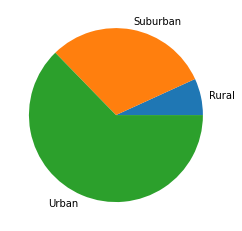

In [66]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percentage, labels=["Rural", "Suburban", "Urban"])
plt.show()

In [67]:
import matplotlib as mpl

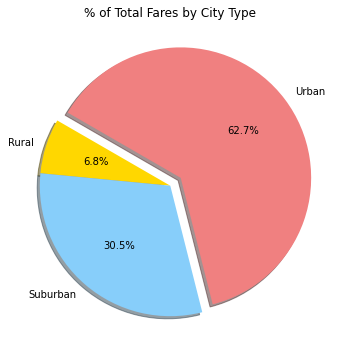

In [69]:
# Build the percentage of fares by city type pie chart.
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percentage,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [70]:
# Calculate the percentage of rides for each city type.

ride_percent = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percent

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

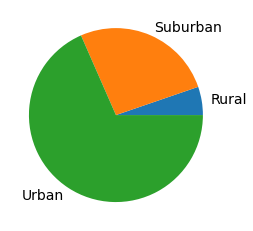

In [71]:
# Build the percentage of ride by city type pie chart.
plt.pie(ride_percent, labels=["Rural", "Suburban", "Urban"])
plt.show()

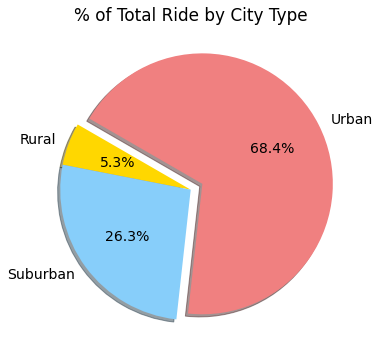

In [72]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Ride by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [73]:
# Calculate the percentage of drivers for each city type.

driver_percent = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum()
driver_percent

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

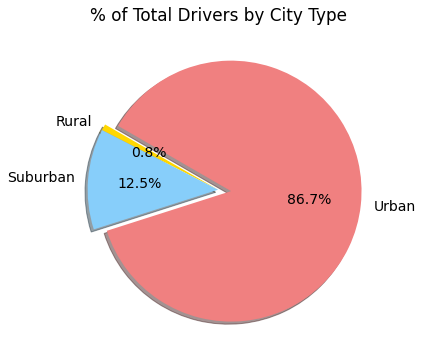

In [74]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percent,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [76]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

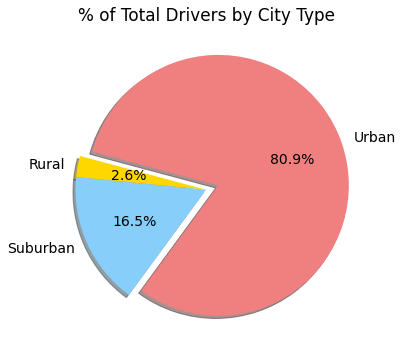

In [78]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig8.png")
# Show Figure
plt.show()